In [1]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # random forest is an ensemble classifier
from sklearn import metrics

In [3]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-04-19T17:36:05.724116,2021-04-19T17:36:05.724116
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [4]:
mat = sb.matches(competition_id=11, season_id=42)

credentials were not supplied. open data access only


In [5]:
mat

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,303421,2020-07-19,17:00:00.000,Spain - La Liga,2019/2020,Deportivo Alavés,Barcelona,0,5,available,unscheduled,2020-07-29T05:00,None,38,Regular Season,Estadio de Mendizorroza,J. Martínez,1.1.0,2,2
1,303493,2020-06-23,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Athletic Bilbao,1,0,available,unscheduled,2020-07-29T05:00,None,31,Regular Season,Camp Nou,Jesús Gil,1.1.0,2,2
2,303516,2020-06-27,17:00:00.000,Spain - La Liga,2019/2020,Celta Vigo,Barcelona,2,2,available,unscheduled,2020-07-29T05:00,None,32,Regular Season,Abanca-Balaídos,G. Cuadra,1.1.0,2,2
3,303680,2020-07-11,19:30:00.000,Spain - La Liga,2019/2020,Real Valladolid,Barcelona,0,1,available,unscheduled,2020-12-18T12:10:38.985394,None,36,Regular Season,Estadio Municipal José Zorrilla,Antonio Mateu,1.1.0,2,2
4,303532,2020-06-16,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Leganés,2,0,available,unscheduled,2020-07-29T05:00,None,29,Regular Season,Camp Nou,J. Martínez,1.1.0,2,2
5,303400,2020-01-25,16:00:00.000,Spain - La Liga,2019/2020,Valencia,Barcelona,2,0,available,unscheduled,2020-07-29T05:00,None,21,Regular Season,Estadio de Mestalla,Jesús Gil,1.1.0,2,2
6,303634,2020-07-16,21:00:00.000,Spain - La Liga,2019/2020,Barcelona,Osasuna,1,2,available,unscheduled,2020-09-18T13:16:12.825671,None,37,Regular Season,Camp Nou,J. Sánchez,1.1.0,2,2
7,303479,2020-03-07,18:30:00.000,Spain - La Liga,2019/2020,Barcelona,Real Sociedad,1,0,available,unscheduled,2020-07-29T05:00,None,27,Regular Season,Camp Nou,J. Martínez,1.1.0,2,2
8,303615,2020-07-08,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Espanyol,1,0,available,unscheduled,2020-09-11T23:12:41.238499,None,35,Regular Season,Camp Nou,J. Munuera,1.1.0,2,2
9,303696,2020-06-30,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Atlético Madrid,2,2,available,unscheduled,2020-07-29T05:00,None,33,Regular Season,Camp Nou,A. Hernández,1.1.0,2,2


In [7]:
mat.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'data_version',
       'shot_fidelity_version', 'xy_fidelity_version'],
      dtype='object')

In [25]:
Ids = []
for i in range(len(mat)):
    Ids += [mat.match_id[i], ]
Ids

[303421,
 303493,
 303516,
 303680,
 303532,
 303400,
 303634,
 303479,
 303615,
 303696,
 303664,
 303596,
 303487,
 303600,
 303548,
 303473,
 303610,
 303652,
 303430,
 303674,
 303470,
 303700,
 303707,
 303666,
 303725,
 303504,
 303715,
 303377,
 303524,
 303451,
 303517,
 303682,
 303731]

In [26]:
E = []
for ids in Ids:
    ev = sb.events(match_id = ids)
    E.append(ev)

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

In [27]:
events = pd.concat(E)
events

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,shot_deflected,block_save_block,foul_committed_penalty,foul_won_penalty,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,shot_saved_off_target,dribble_no_touch,goalkeeper_success_in_play,goalkeeper_lost_in_play
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
events.columns

Index(['ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'carry_end_location', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot',
       ...
       'shot_deflected', 'block_save_block', 'foul_committed_penalty',
       'foul_won_penalty', 'goalkeeper_punched_out',
       'goalkeeper_shot_saved_off_target', 'shot_saved_off_target',
       'dribble_no_touch', 'goalkeeper_success_in_play',
       'goalkeeper_lost_in_play'],
      dtype='object', length=106)

In [124]:
for i in events.columns: print(i)

ball_receipt_outcome
ball_recovery_offensive
ball_recovery_recovery_failure
block_deflection
block_offensive
carry_end_location
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_offensive
foul_committed_type
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
id
index
injury_stoppage_in_chain
interception_outcome
location
match_id
minute
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_deflected
pass_end_location
pass_goal_assist
pass_height
pass_length
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_shot_assist
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player
position
possession
possession_team
related_events
second
shot_body_part


In [125]:
E = events[events['team']=='Barcelona']
E

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,shot_deflected,block_save_block,foul_committed_penalty,foul_won_penalty,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,shot_saved_off_target,dribble_no_touch,goalkeeper_success_in_play,goalkeeper_lost_in_play
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
E_shot = E[['type', 'shot_body_part', 'shot_first_time', 'shot_one_on_one',
       'shot_open_goal', 'shot_outcome', 'shot_statsbomb_xg', 'shot_technique',
       'shot_type']]
E_shot

,type,shot_body_part,shot_first_time,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
1,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3680,Half End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3681,Half End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3683,Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3686,Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
E_shot.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Dribble', 'Duel', 'Foul Committed', 'Foul Won',
       'Dribbled Past', 'Ball Recovery', 'Dispossessed', 'Miscontrol',
       'Shot', 'Goal Keeper', 'Clearance', 'Block', 'Injury Stoppage',
       'Half End', 'Substitution', 'Tactical Shift', 'Player Off',
       'Player On', 'Referee Ball-Drop', 'Interception', '50/50',
       'Shield', 'Bad Behaviour', 'Offside', 'Error', 'Own Goal For'],
      dtype=object)

In [128]:
E_shot = E_shot[E_shot['type']=='Shot']
E_shot

,type,shot_body_part,shot_first_time,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
3846,Shot,Right Foot,NaN,NaN,NaN,Post,0.029270,Normal,Open Play
3848,Shot,Right Foot,NaN,NaN,NaN,Off T,0.026954,Normal,Open Play
3849,Shot,Right Foot,True,NaN,NaN,Post,0.029080,Half Volley,Open Play
3852,Shot,Left Foot,NaN,NaN,NaN,Post,0.039079,Normal,Open Play
3853,Shot,Left Foot,NaN,True,NaN,Saved,0.163406,Half Volley,Open Play
...,...,...,...,...,...,...,...,...,...
3621,Shot,Left Foot,True,NaN,NaN,Saved,0.250509,Half Volley,Open Play
3629,Shot,Left Foot,NaN,NaN,NaN,Saved Off Target,0.067505,Normal,Free Kick
3630,Shot,Left Foot,NaN,NaN,True,Goal,0.835386,Normal,Open Play
3631,Shot,Left Foot,NaN,True,NaN,Saved,0.364813,Normal,Open Play


In [129]:
E_shot = E_shot.reset_index()

In [130]:
E_shot.shot_body_part.unique()

array(['Right Foot', 'Left Foot', 'Head'], dtype=object)

In [131]:
E_shot.shot_first_time.unique()

array([nan, True], dtype=object)

In [132]:
E_shot.shot_one_on_one.unique()

array([nan, True], dtype=object)

In [133]:
E_shot.shot_open_goal.unique()

array([nan, True], dtype=object)

In [134]:
E_shot.shot_outcome.unique()

array(['Post', 'Off T', 'Saved', 'Goal', 'Wayward', 'Blocked',
       'Saved Off Target'], dtype=object)

In [135]:
E_shot.shot_technique.unique()

array(['Normal', 'Half Volley', 'Volley', 'Lob', 'Diving Header',
       'Overhead Kick', 'Backheel'], dtype=object)

In [136]:
E_shot.shot_type.unique()

array(['Open Play', 'Free Kick', 'Penalty'], dtype=object)

In [137]:
E_shot['shot_body_part'] = E_shot['shot_body_part'].replace(['Right Foot', 'Left Foot', 'Head', 'Other'], [1., 1., 0.5, 0.2])
E_shot['shot_outcome'] = E_shot['shot_outcome'].replace(['Post', 'Off T', 'Blocked', 'Saved', 'Goal', 'Wayward',
       'Saved to Post', 'Saved Off Target'], [1, 0, 1, 1, 2, 0, 1, 0])
E_shot['shot_technique'] = E_shot['shot_technique'].replace(['Normal', 'Half Volley', 'Volley', 'Lob', 'Diving Header',
       'Overhead Kick', 'Backheel'], [1., 0.6, 0.6, 0.5, 0.2, 0.1, 0.1])
E_shot

,index,type,shot_body_part,shot_first_time,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
0,3846,Shot,1.0,NaN,NaN,NaN,1,0.029270,1.0,Open Play
1,3848,Shot,1.0,NaN,NaN,NaN,0,0.026954,1.0,Open Play
2,3849,Shot,1.0,True,NaN,NaN,1,0.029080,0.6,Open Play
3,3852,Shot,1.0,NaN,NaN,NaN,1,0.039079,1.0,Open Play
4,3853,Shot,1.0,NaN,True,NaN,1,0.163406,0.6,Open Play
...,...,...,...,...,...,...,...,...,...,...
425,3621,Shot,1.0,True,NaN,NaN,1,0.250509,0.6,Open Play
426,3629,Shot,1.0,NaN,NaN,NaN,0,0.067505,1.0,Free Kick
427,3630,Shot,1.0,NaN,NaN,True,2,0.835386,1.0,Open Play
428,3631,Shot,1.0,NaN,True,NaN,1,0.364813,1.0,Open Play


In [138]:
E_shot['shot_type'] = E_shot['shot_type'].replace(['Open Play', 'Free Kick', 'Penalty'], [0.8, 0.6, 1.])
E_shot

,index,type,shot_body_part,shot_first_time,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
0,3846,Shot,1.0,NaN,NaN,NaN,1,0.029270,1.0,0.8
1,3848,Shot,1.0,NaN,NaN,NaN,0,0.026954,1.0,0.8
2,3849,Shot,1.0,True,NaN,NaN,1,0.029080,0.6,0.8
3,3852,Shot,1.0,NaN,NaN,NaN,1,0.039079,1.0,0.8
4,3853,Shot,1.0,NaN,True,NaN,1,0.163406,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...
425,3621,Shot,1.0,True,NaN,NaN,1,0.250509,0.6,0.8
426,3629,Shot,1.0,NaN,NaN,NaN,0,0.067505,1.0,0.6
427,3630,Shot,1.0,NaN,NaN,True,2,0.835386,1.0,0.8
428,3631,Shot,1.0,NaN,True,NaN,1,0.364813,1.0,0.8


In [139]:
E_shot['shot_first_time'] = E_shot['shot_first_time'].fillna(0)
E_shot['shot_first_time'] = E_shot['shot_first_time'].replace([True], [1])
E_shot['shot_one_on_one'] = E_shot['shot_one_on_one'].fillna(0)
E_shot['shot_one_on_one'] = E_shot['shot_one_on_one'].replace([True], [1])
E_shot['shot_open_goal'] = E_shot['shot_open_goal'].fillna(0)
E_shot['shot_open_goal'] = E_shot['shot_open_goal'].replace([True], [1])
E_shot

,index,type,shot_body_part,shot_first_time,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
0,3846,Shot,1.0,0,0,0,1,0.029270,1.0,0.8
1,3848,Shot,1.0,0,0,0,0,0.026954,1.0,0.8
2,3849,Shot,1.0,1,0,0,1,0.029080,0.6,0.8
3,3852,Shot,1.0,0,0,0,1,0.039079,1.0,0.8
4,3853,Shot,1.0,0,1,0,1,0.163406,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...
425,3621,Shot,1.0,1,0,0,1,0.250509,0.6,0.8
426,3629,Shot,1.0,0,0,0,0,0.067505,1.0,0.6
427,3630,Shot,1.0,0,0,1,2,0.835386,1.0,0.8
428,3631,Shot,1.0,0,1,0,1,0.364813,1.0,0.8


In [141]:
x = E_shot[['shot_body_part', 'shot_first_time', 'shot_one_on_one',
            'shot_open_goal', 'shot_statsbomb_xg', 'shot_technique',
            'shot_type']]
y = E_shot['shot_outcome']
x.shape, y.shape

((430, 7), (430,))

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.32, random_state = 0)

In [143]:
x_train

,shot_body_part,shot_first_time,shot_one_on_one,shot_open_goal,shot_statsbomb_xg,shot_technique,shot_type
326,1.0,0,0,0,0.015647,1.0,0.8
408,1.0,0,0,0,0.072451,1.0,0.8
275,1.0,1,0,1,0.798362,1.0,0.8
294,1.0,1,0,0,0.026743,1.0,0.8
374,1.0,0,0,0,0.365205,1.0,0.8
...,...,...,...,...,...,...,...
323,0.5,0,0,0,0.229599,1.0,0.8
192,1.0,0,1,0,0.271566,1.0,0.8
117,1.0,0,0,0,0.036244,1.0,0.6
47,1.0,0,0,0,0.039357,1.0,0.8


In [144]:
y_train

326    1
408    1
275    2
294    1
374    1
      ..
323    1
192    2
117    0
47     1
172    1
Name: shot_outcome, Length: 137, dtype: int64

In [145]:
dt = DecisionTreeClassifier()

In [146]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [147]:
y_predicted = dt.predict(x_test)

In [148]:
y_predicted

array([0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Original'>

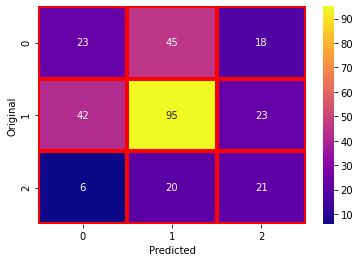

In [149]:
error_matrix = pd.crosstab(y_test, y_predicted, rownames=['Original'], colnames=['Predicted'])
sns.heatmap(error_matrix, annot=True, cmap = 'plasma', linewidths = 3, linecolor = 'red')

In [150]:
accuracy = metrics.accuracy_score(y_test, y_predicted)
accuracy

0.47440273037542663

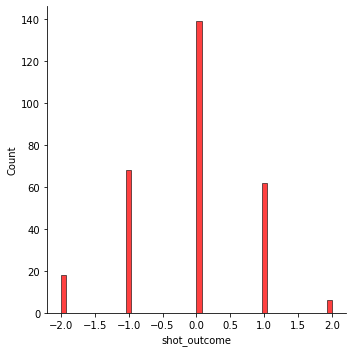

In [151]:
sns.displot((y_test - y_predicted), bins = 50, color = 'red')

In [152]:
from sklearn.tree import export_graphviz
f = open("shot_outcome.dot", 'w')

export_graphviz(
 dt,
 out_file = f,
 feature_names = ['shot_body_part', 'shot_first_time', 'shot_one_on_one',
            'shot_open_goal', 'shot_statsbomb_xg', 'shot_technique',
            'shot_type'],
 class_names = ['0', '1', '2'],
 rounded = True,
 filled = True
 )

In [153]:
import networkx as nx
from networkx.drawing.nx_pydot import read_dot
T=nx.Graph(read_dot("shot_outcome.dot"))

### the tree visualization needs some work

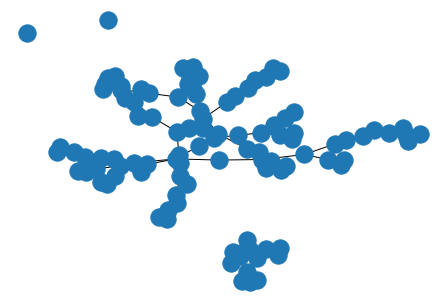

In [154]:
nx.draw(T, pos=nx.spring_layout(T))